## Exploratory data analysis

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
image_folder = "images"

os.makedirs(image_folder, exist_ok=True)

In [ ]:
df=pd.read_csv('merged_cleaned_dataset_balanced.csv')
print(df.head())
print(df.shape)
print(df.columns)

                                        cleaned_text  label
0  moment wear natural hair tie black walk past t...      1
1  telephone bother jim sorry care learn link stu...      0
2      rt woman comedian suck notsexist disappointed      1
3  happy pride month identify straight cisgender ...      1
4  nevermind assimilated puppy sorry bother chees...      0
(93552, 2)
Index(['cleaned_text', 'label'], dtype='object')


Label = 1: 45222
Label = 0: 48330


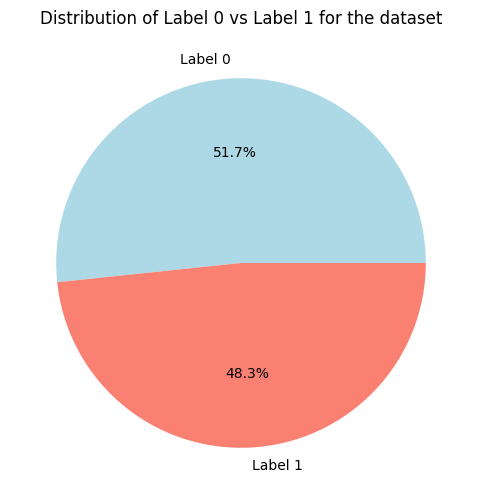

In [ ]:
import matplotlib.pyplot as plt
import os

label_counts = df["label"].value_counts()

label_0 = label_counts.get(0, 0)
label_1 = label_counts.get(1, 0)

print(f"Label = 1: {label_1}")
print(f"Label = 0: {label_0}")

plt.figure(figsize=(6, 6))
plt.pie([label_0, label_1], labels=["Label 0", "Label 1"], autopct="%1.1f%%", colors=["lightblue", "salmon"])
plt.title("Distribution of Label 0 vs Label 1 for the dataset")
plt.savefig(os.path.join(image_folder, "label_distribution.png"))
plt.show()


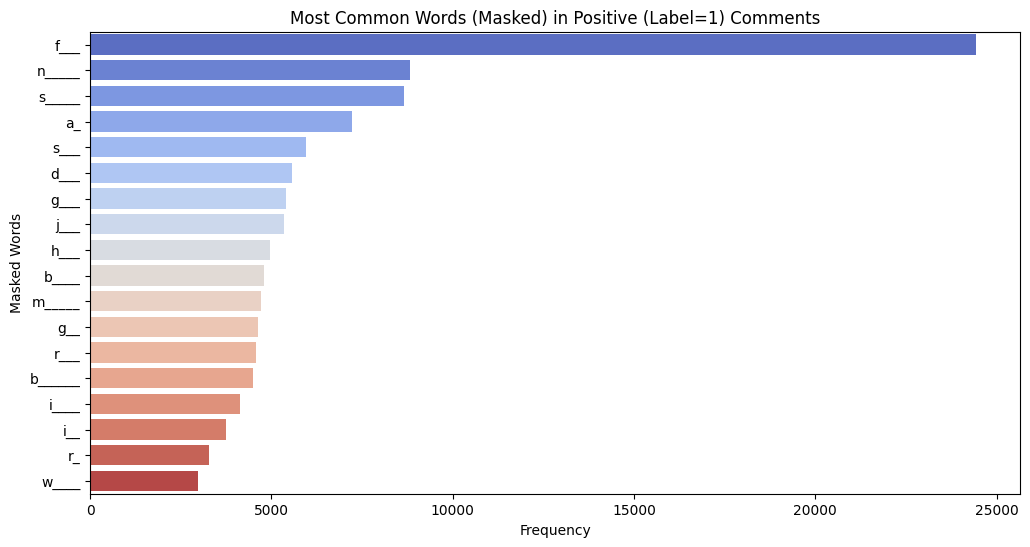

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df["cleaned_text"] = df["cleaned_text"].astype(str).fillna("")

positive_texts = df[df["label"] == 1]["cleaned_text"]

text_data = " ".join(positive_texts)

word_list = text_data.split()

word_counts = Counter(word_list)

common_words = word_counts.most_common(20)

masked_words = [(w[0][0] + '_' * (len(w[0]) - 1), w[1]) for w in common_words]

words_df = pd.DataFrame(masked_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Word", hue="Word", data=words_df, palette="coolwarm", dodge=False, legend=False, errorbar=None)
plt.xlabel("Frequency")
plt.ylabel("Masked Words")
plt.title("Most Common Words (Masked) in Positive (Label=1) Comments")
plt.show()


<ipython-input-24-3fd1a30d3486>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_text_length.index, y=avg_text_length.values, palette=custom_colors, width=0.5, errorbar=None)


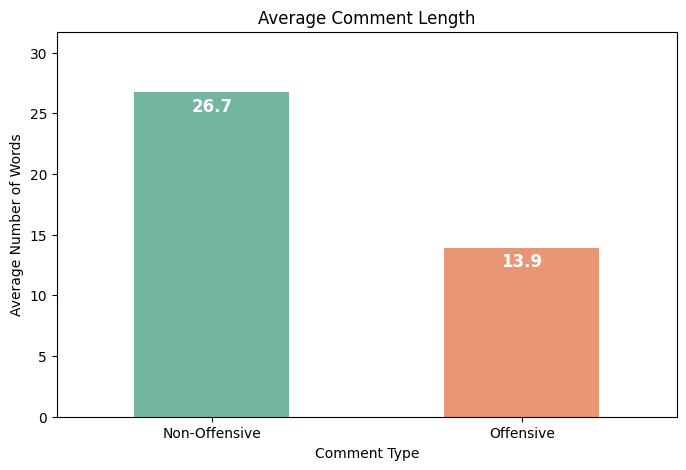

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x).split()))

avg_text_length = df.groupby("label")["text_length"].mean()

custom_colors = ["#66c2a5", "#fc8d62"]  # Mint green for Non-Offensive, Soft orange for Offensive

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=avg_text_length.index, y=avg_text_length.values, palette=custom_colors, width=0.5, errorbar=None)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color="white", fontweight="bold",
                xytext=(0, -10), textcoords="offset points")

plt.xticks([0, 1], ["Non-Offensive", "Offensive"])
plt.xlabel("Comment Type")
plt.ylabel("Average Number of Words")
plt.title("Average Comment Length")
plt.ylim(0, max(avg_text_length.values) + 5)

plt.savefig(os.path.join(image_folder, "average_comment_length.png"))
plt.show()


<ipython-input-72-6c5f0cc7f284>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len_binned', data=df, palette='viridis')
<ipython-input-72-6c5f0cc7f284>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


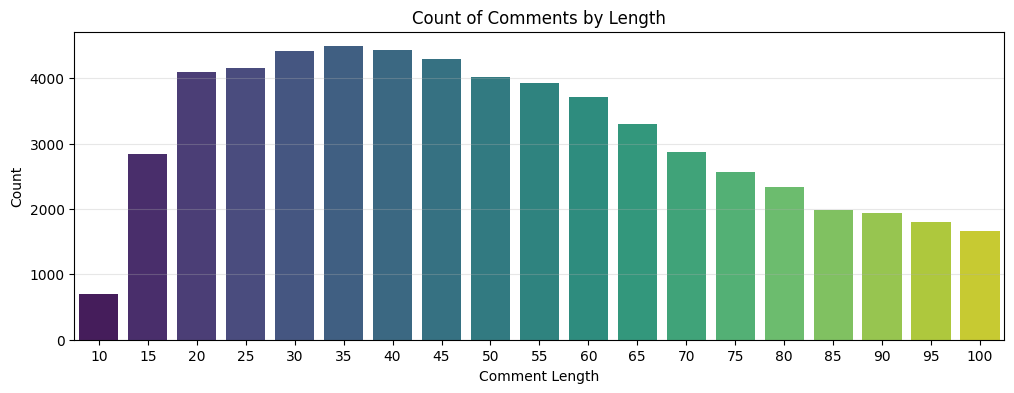

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['text_len'] = df['cleaned_text'].apply(len)

df = df[df['text_len'] <= 105]

bins = list(range(10, 110, 5))
labels = [f'{i}' for i in range(10, 105, 5)]

df['text_len_binned'] = pd.cut(df['text_len'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 4))
ax = sns.countplot(x='text_len_binned', data=df, palette='viridis')
plt.title('Count of Comments by Length')
plt.ylabel('Count')
plt.xlabel('Comment Length')
ax.yaxis.grid(True, alpha=0.3)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.savefig(os.path.join(image_folder,'comment_length_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()